In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


num = 0
for root, dirs, files in os.walk("archive"):
    for file in files:
        num = num + 1        
print(num)

2481


In [2]:
import torch
from torch import nn
import torchvision 
import torchvision.transforms as transforms 
from torch.utils.tensorboard import SummaryWriter 
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.densenet = torch.hub.load('pytorch/vision:v0.6.0','densenet201',pretrained=True)
        for p in self.densenet.parameters():
            p.requires_grad = False
        self.densenet.classifier = nn.Identity()
        self.flatten1 = nn.Flatten()
        self.linear1 = nn.Linear(1920, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.linear2 = nn.Linear(128,64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.linear3 = nn.Linear(64,2)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x=self.densenet(x)
        x=self.flatten1(x)
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.dropout1(x)
        x=self.linear2(x)
        x=self.relu2(x)
        x=self.dropout2(x)
        x=self.linear3(x)
        x=self.sigmoid(x)
        return x

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
transform = transforms.Compose(
    [ transforms.Resize((224,224)),transforms.ToTensor(),
      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
    ])

dataset = torchvision.datasets.ImageFolder('archive', transform=transform)

testloader = torch.utils.data.DataLoader(dataset,batch_size=20,shuffle=True,
                                           num_workers=1,drop_last = True)

print(dataset.classes)

['COVID', 'non-COVID']


In [5]:
model = Net()
model.load_state_dict(torch.load('trained_model.pt'))
model.to(device)


Using cache found in C:\Users\peter/.cache\torch\hub\pytorch_vision_v0.6.0


Net(
  (densenet): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Accuracy of the model: 58.14516129032258 %


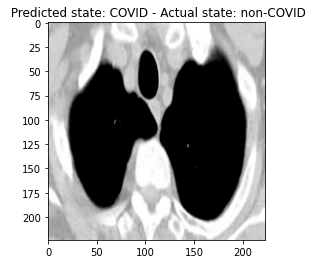

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


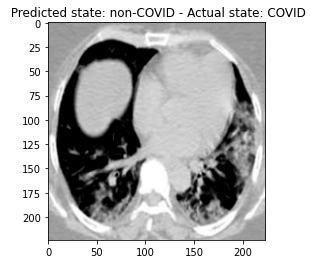

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


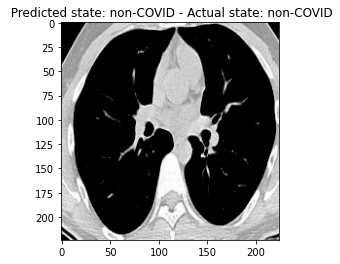

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


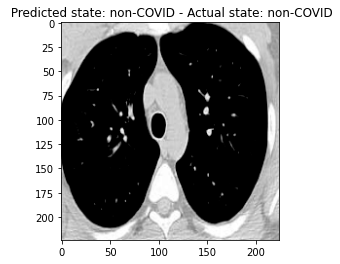

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


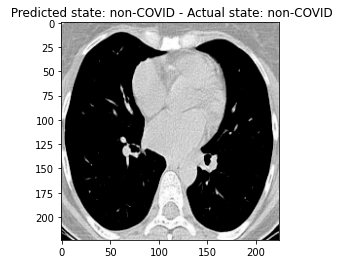

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


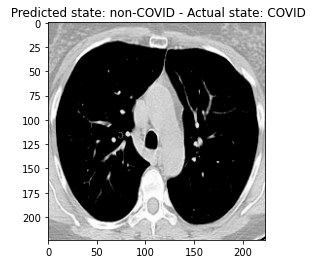

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


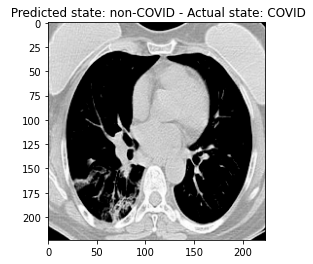

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


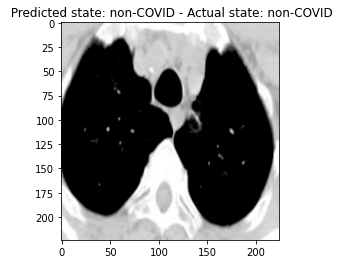

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


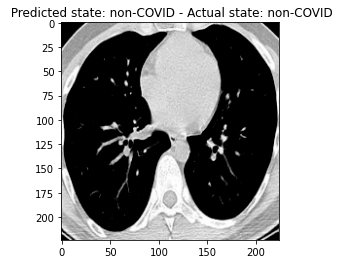

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


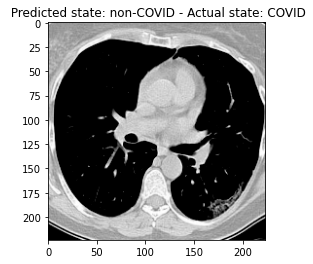

In [6]:
import random

correct = 0
total = 0
true_value = 0 

with torch.no_grad():

    for data, target in testloader:
        images = data.to(device)
        labels = target.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.detach(), 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
       

        accuracy = correct / total

    print('Test Accuracy of the model: {} %'.format(100 * accuracy))
    
    
    for f in range(10):
                   
        index = random.randint(0, num-1)
        item = dataset[index]
        image = item[0]
        image = image.reshape(1,3,224,224)
        true_target = item[1]
        
        image = image.to(device)

        model.eval()

        prediction = model(image)

        predicted_class = np.argmax(prediction.cpu())
        
        if (predicted_class == 1):
            predicted_label = 'non-COVID'
        else:
            predicted_label = 'COVID'
            
        if (true_target == 1):
            true_label = 'non-COVID'
        else:
            true_label = 'COVID'

        input_picture = item[0].permute(1,2,0)


        plt.imshow(input_picture,cmap='gray')
        plt.title(f' Predicted state: {predicted_label} - Actual state: {true_label}')
        plt.show()